In [3]:
import PIL.Image as I
import matplotlib.pyplot as plt
import numpy as np
import torch
import kornia
import torchvision.transforms as T


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
imgList = [
    "imgs/advs/pred_r18_begin_cat.jpg",
    "imgs/advs/pred_r18_canny_cat.jpg",
    "imgs/advs/pred_r18_adv_cat.jpg",
    # "imgs/advs/pred_r18_cat.jpg",
]
pil_imgs = [I.open(img) for img in imgList]

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
class UnNormalize(object):
    def __init__(self, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor
unorm = UnNormalize()

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
def get_denormalized_imagenet(img):
    # return img
    return kornia.denormalize(
        torch.Tensor(img),
        torch.Tensor([0.485, 0.456, 0.406]),
        torch.tensor([0.229, 0.224, 0.225])
    )


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
img_preprocess = T.Compose([
    # We use single int value inside a list due to torchscript type restrictions
    # T.Resize([256, ]),
    # T.CenterCrop(224),
    T.ToTensor(),
    # T.ConvertImageDtype(torch.float),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # T.ToPILImage(),
])

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
img2 = img_preprocess(pil_imgs[0])

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


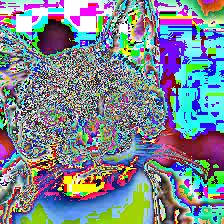

In [10]:
T.ToPILImage()(img2)

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


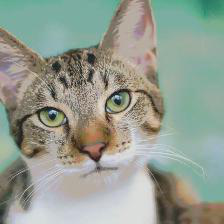

In [11]:
img3 = unorm(img2)
T.ToPILImage()(img3)

In [12]:
to_pil = T.ToPILImage()
to_tensor = T.ToTensor()

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tensor(0.0039)
torch.return_types.max(
values=tensor([[0.0039, 0.0039, 0.0000,  ..., 0.0157, 0.0196, 0.0196],
        [0.0078, 0.0039, 0.0039,  ..., 0.0118, 0.0157, 0.0196],
        [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0118, 0.0157],
        ...,
        [0.0196, 0.0078, 0.0157,  ..., 0.0196, 0.0196, 0.0275],
        [0.0118, 0.0157, 0.0157,  ..., 0.0157, 0.0196, 0.0235],
        [0.0157, 0.0353, 0.0431,  ..., 0.0235, 0.0235, 0.0196]]),
indices=tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 2,  ..., 0, 0, 0],
        [2, 2, 2,  ..., 1, 0, 0],
        [2, 2, 2,  ..., 1, 1, 0]]))


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


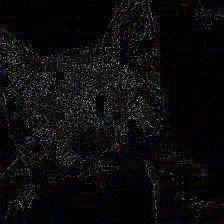

In [17]:
noise = torch.abs(to_tensor(pil_imgs[0]) - to_tensor(pil_imgs[2]))
print(noise[0, 0, 0])
print(torch.max(noise, 0))
to_pil(noise*3)

In [100]:
_a = T.ToTensor()(img2)
print(_a.shape)

torch.Size([1, 3, 224, 224])


D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
plt.style.available

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'light',
 'muted',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

D:\app\Miniconda3\envs\adv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


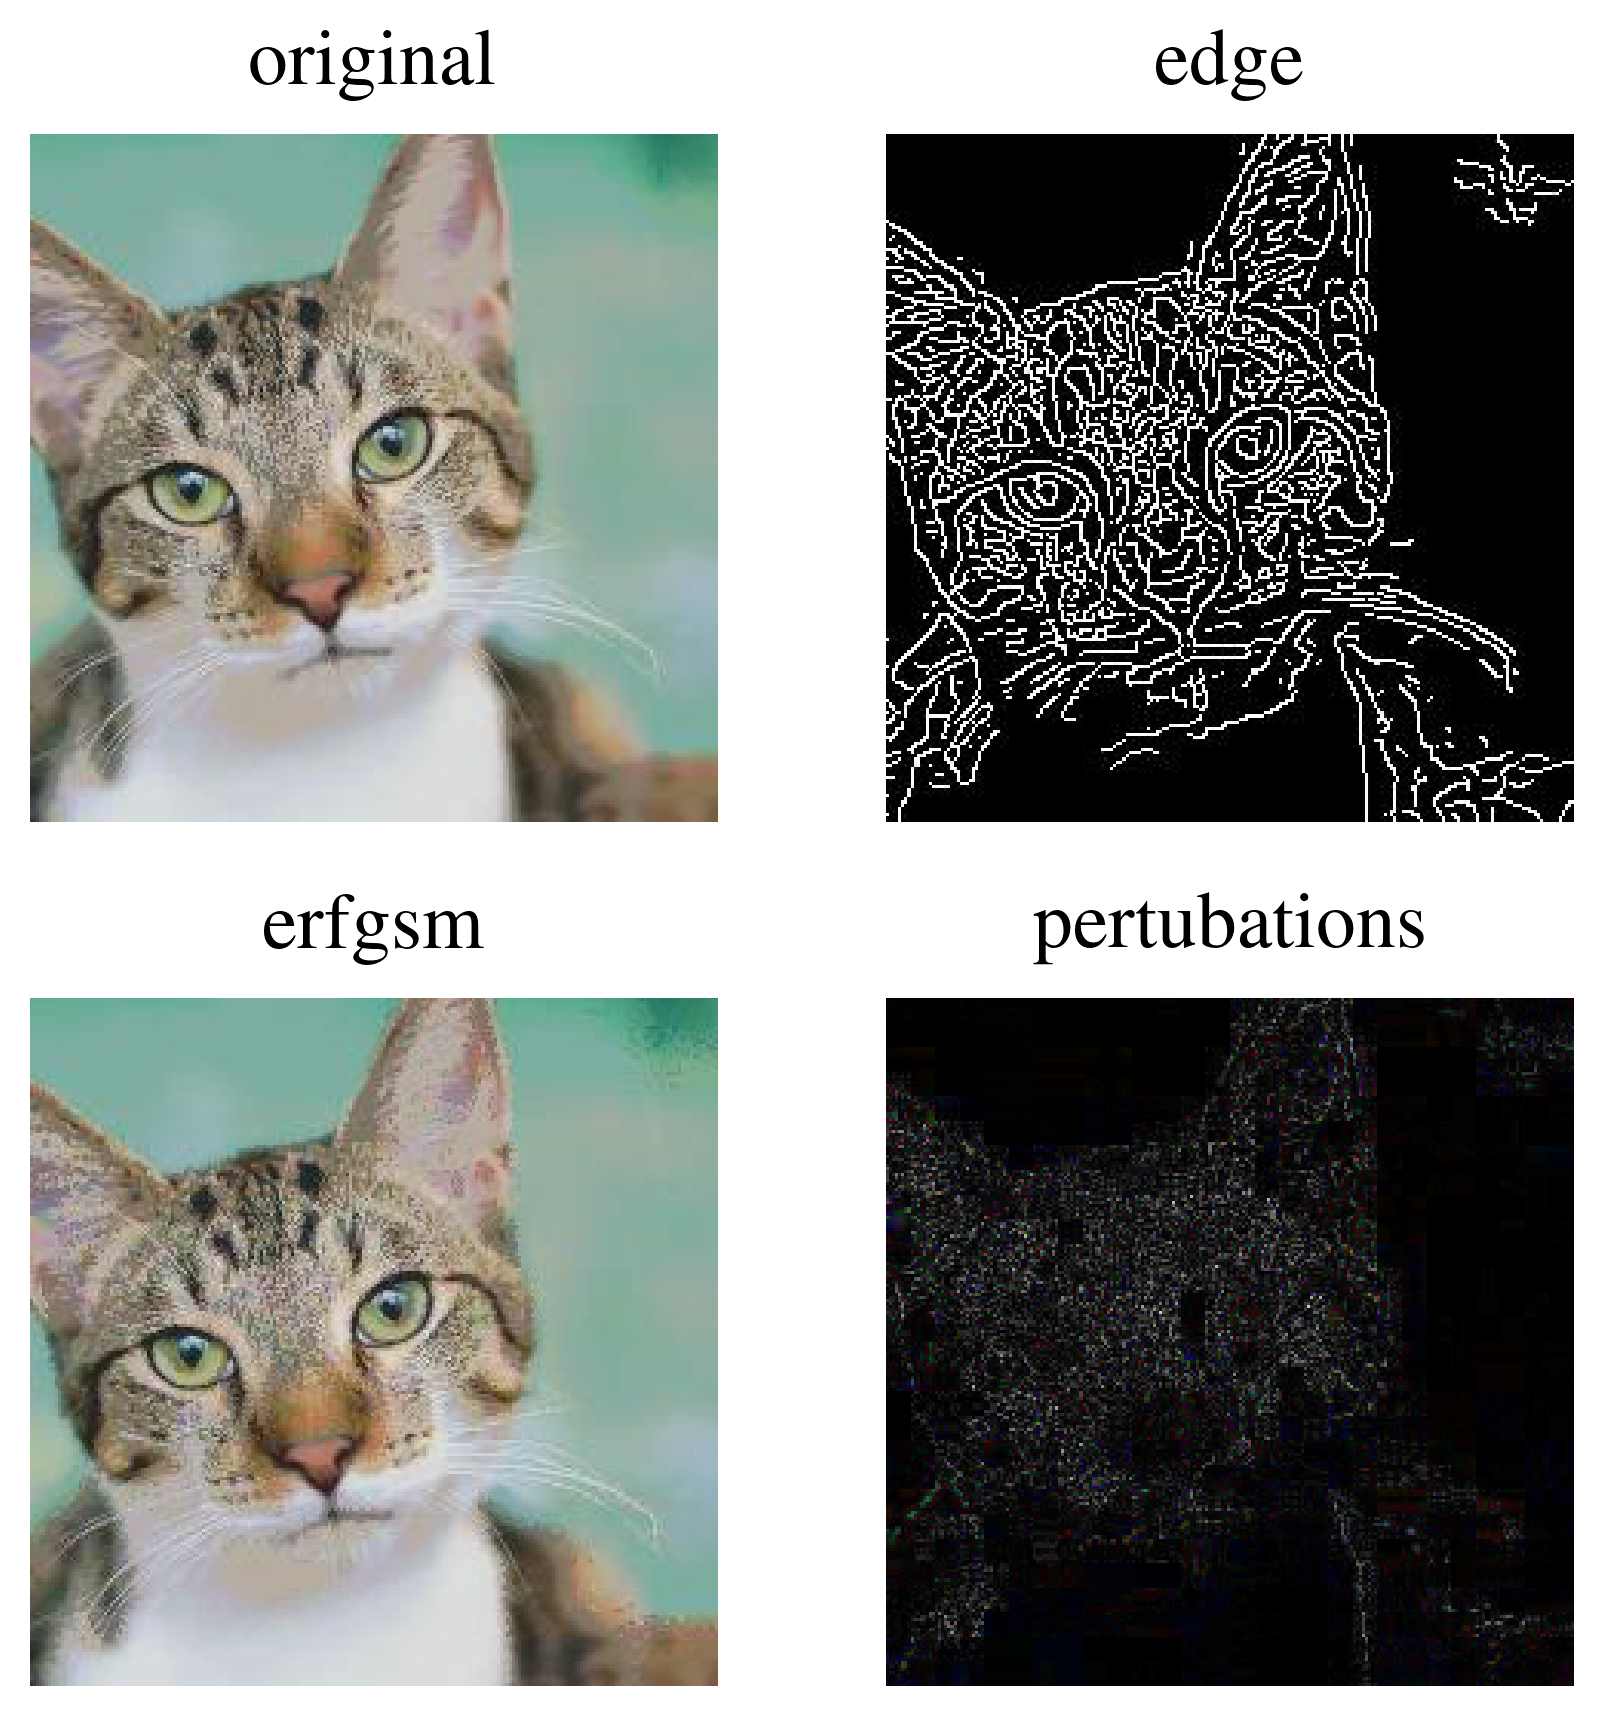

In [30]:
with plt.style.context(['science', 'ieee']):
    plt.figure(figsize=(3, 3))
    # f,(ax0, ax1, ax2, ax3)
    plt.subplot(221)
    plt.axis('off')
    plt.title("original")
    plt.imshow(pil_imgs[0])

    plt.subplot(222)
    plt.axis('off')
    plt.title("edge")
    plt.imshow(pil_imgs[1], cmap='gray')

    plt.subplot(223)
    plt.axis('off')
    plt.title("erfgsm")
    plt.imshow(pil_imgs[2])

    # plt.subplot(224)
    # plt.title("fgsm-mask-half")
    # plt.axis('off')
    # plt.imshow(pil_imgs[3])

    plt.subplot(224)
    plt.title("pertubations")
    plt.axis('off')
    plt.imshow(to_pil(noise*3))

    plt.tight_layout()
    plt.show()

In [ ]:
def draw_images_grid_with_labels(data, nrows, figsize=(12, 12), **subplots_adjust_param):
    import matplotlib.pyplot as plt
    _, axes = plt.subplots(nrows, len(data) // nrows, figsize=figsize)
    axes = axes.flatten()
    for idx, (img, axe) in enumerate(zip(data, axes)):
        # img = data[idx][0][0].permute(1, 2, 0)
        label = data[idx][1]
        axe.imshow(img)
#         axe.set_title(label)
        axe.set_title(label.replace("_", ""))
        
    # plt.subplots_adjust(**subplots_adjust_param)
    plt.tight_layout()
#     plt.subplot_tool()
    plt.show()


params = {
    "left": 0.125,  # the left side of the subplots of the figure
    "right": 0.9,   # the right side of the subplots of the figure
    "bottom": 0,  # the bottom of the subplots of the figure
    "top": 0.3,     # the top of the subplots of the figure
    "wspace": 0.3,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    "hspace": 0.3,  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
}
# import matplotlib
# matplotlib.rcParams['axes.unicode_minus'] = False
# with plt.style.context(['science', 'no-latex']):
#     draw_images_grid_with_labels(res, 10, figsize=(16, 16), **params)